In [1]:
import sys
import os
import json
import pickle
from mmdet3d.datasets.pipelines import Compose
import mmcv
import numpy as np

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# change working directory
os.chdir(
    "/home/katzkid/Documents/MV2Dbasedlifting"
)
print("Current Working Directory:", os.getcwd())

from mmdet3d_plugin import CustomLIDCDataset

data_root_lidc = "./data/lidc/"

lidc_dataclass = CustomLIDCDataset(
    data_root=data_root_lidc,
    ann_file=data_root_lidc + "toy_infos.pkl",
    ann_file_2d=data_root_lidc + "toy_infos_2d_anno.coco.json",
)

No ROCm runtime is found, using ROCM_HOME='/opt/rocm-6.1.3'
Current Working Directory: /home/katzkid/Documents/MV2Dbasedlifting
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [2]:
test_pipeline = [
    dict(type="LoadMultiViewImageFromFiles", to_float32=True),
    dict(
        type="LoadAnnotationsMono3D",
        with_bbox_3d=False,
        with_label_3d=False,
        with_bbox_2d=False,
        with_attr_label=False,
    ),
    dict(type="PadMultiViewImage", size_divisor=32),
    dict(
        type="DefaultFormatBundleMono3D", class_names=["nodule"], with_label=False
    ),  # Follow train_pipeline, without label
    dict(type="CollectMono3DLIDC", debug=False, keys=["img"]),
]

pipeline = Compose(test_pipeline)

In [3]:
#
# Read outputs from file
#
with open("eval_result/outputs.pkl", "rb") as f:
    outputs = pickle.load(f)

len(outputs)

# for i, result in enumerate(outputs):
#     point = lidc_dataclass._extract_data(i, pipeline=pipeline, key="point")
#     print(point)

2

In [ ]:
outputs[0]["pts_bbox"]

{'boxes_3d': CameraInstance3DBoxes(
     tensor([[ 5.1162e+01, -5.1084e+01,  8.6403e-01,  7.5836e+00,  7.8858e+00,
           4.2698e+00,  7.9395e-04],
         [ 5.1182e+01, -5.0714e+01, -7.5548e+00,  8.5807e+00,  9.4250e+00,
           5.1095e+00,  4.0444e-03],
         [-5.1200e+01, -5.0538e+01, -7.4969e+00,  8.4107e+00,  9.2014e+00,
           4.9939e+00,  5.9246e-03],
         [ 5.1186e+01, -5.0212e+01, -7.4752e+00,  8.3234e+00,  9.0175e+00,
           4.9504e+00,  5.3716e-03],
         [-5.1200e+01, -4.7626e+01,  3.3550e-01,  8.5219e+00,  9.1917e+00,
           5.3254e+00, -4.7433e-03],
         [ 5.1195e+01, -4.3937e+01,  2.6966e-01,  8.6033e+00,  9.1274e+00,
           5.4566e+00, -5.1695e-03],
         [ 5.1195e+01, -4.3906e+01,  2.6909e-01,  8.6038e+00,  9.1272e+00,
           5.4578e+00, -5.1612e-03],
         [-5.1200e+01, -4.3841e+01,  2.6393e-01,  8.6031e+00,  9.1283e+00,
           5.4681e+00, -5.0911e-03],
         [ 5.1195e+01, -4.3455e+01, -7.7314e+00,  8.5978e+00,  9

In [5]:
result_files, tmp_dir = lidc_dataclass.format_results(outputs)


Formating bboxes of pts_bbox
Start to convert detection format...
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 2/2, 124.4 task/s, elapsed: 0s, ETA:     0s
Results writes to /tmp/tmpxpwggkqc/results/pts_bbox/results_lidc.json


In [6]:
pts_box = result_files["pts_bbox"]

with open(result_files["pts_bbox"], "rb") as f:
    result_lidc = json.load(f)

len(result_lidc["results"]["0"])

result_0 = result_lidc["results"]["0"]

result_lidc["results"]["0"]

[{'sample_token': 0,
  'translation': [51.1621208190918, -55.027366638183594, 0.8640260696411133],
  'size': [7.583618640899658, 7.8857927322387695, 4.269811630249023],
  'rotation': [0.999999921204919, 0.0, 0.0, 0.0003969762661070855],
  'velocity': [0, 0],
  'detection_name': 'nodule',
  'detection_score': 0.23275133967399597,
  'attribute_name': None},
 {'sample_token': 0,
  'translation': [51.18184280395508, -55.425994873046875, -7.554758071899414],
  'size': [8.580738067626953, 9.424960136413574, 5.109525680541992],
  'rotation': [0.9999979553273762, 0.0, 0.0, 0.0020222119242977858],
  'velocity': [0, 0],
  'detection_name': 'nodule',
  'detection_score': 0.195853129029274,
  'attribute_name': None},
 {'sample_token': 0,
  'translation': [-51.19993591308594, -55.13853454589844, -7.49692440032959],
  'size': [8.410650253295898, 9.201355934143066, 4.993858337402344],
  'rotation': [0.999995612339194, 0.0, 0.0, 0.0029623136836660065],
  'velocity': [0, 0],
  'detection_name': 'nodule

In [2]:
ann = lidc_dataclass.get_data_info(0)  #Execute this only once

In [3]:
# gt_bbox_3d = lidc_dataclass.get_ann_info(0)["gt_bboxes_3d"]
# gt_bbox_3d

# img_path = lidc_dataclass.get_data_info(0)["img_filename"][0]
# print(img_path)
# img = mmcv.imread(img_path)
# img = np.array(img)
# img.shape

# intrinsics = lidc_dataclass.get_data_info(0)["intrinsics"]
# len(intrinsics)
# cam00_intrinsic = intrinsics[0]
# print(cam00_intrinsic)




img_path = ann["img_filename"][1]
print(img_path)
img = mmcv.imread(img_path)
img = np.array(img)
img.shape

intrinsics = ann["intrinsics"]
len(intrinsics)
cam00_intrinsic = intrinsics[1]
print(cam00_intrinsic)

./data/lidc/Images/Patient0000/Image_01.png
[[ 600.          0.       -400.390625    0.      ]
 [   0.        600.       -400.390625    0.      ]
 [   0.          0.          1.          0.      ]
 [   0.          0.          0.          1.      ]]


In [4]:
#convert the intrinsic values from mm to pixels
pixel_size = 800/1024
cam00_intrinsic[0, 0] = cam00_intrinsic[0, 0] / pixel_size
cam00_intrinsic[1, 1] = cam00_intrinsic[1, 1] / pixel_size
cam00_intrinsic[0, 2] = cam00_intrinsic[0, 2] / pixel_size
cam00_intrinsic[1, 2] = cam00_intrinsic[1, 2] / pixel_size 
print(cam00_intrinsic)


[[ 768.     0.  -512.5    0. ]
 [   0.   768.  -512.5    0. ]
 [   0.     0.     1.     0. ]
 [   0.     0.     0.     1. ]]


In [5]:
cam00_intrinsic[0,2] = -cam00_intrinsic[0,2]
cam00_intrinsic[1,2] = -cam00_intrinsic[1,2]

In [6]:
gt_bbox_3d = ann["ann_info"]["gt_bboxes_3d"]
gt_bbox_3d

CameraInstance3DBoxes(
    tensor([[ 46.0547, -20.6250, 249.6875,  34.4531,  28.1250,  17.5000,   0.0000],
        [ 44.6484, -21.7188, 246.3281,  30.2344,  29.5312,  15.0000,   0.0000],
        [ 45.3516, -22.0312, 247.5781,  31.6406,  26.7188,  17.5000,   0.0000],
        [ 47.4609, -22.0312, 250.9375,  35.8594,  26.7188,  20.0000,   0.0000]]))

In [7]:
gt_bbox_2d = ann["ann_info"]["gt_bboxes_2d"][1]
len(gt_bbox_2d)
gt_bbox_2d = gt_bbox_2d

#test_bbox = np.array([[567, 369, 567 + 70, 369 + 54]])


mmcv.imshow_bboxes(img, gt_bbox_2d, out_file="p0000cam00_wbbox.png")

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


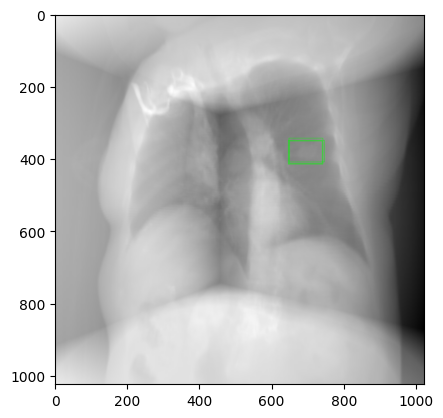

In [8]:
from matplotlib import pyplot as plt
# Display the image using matplotlib
plt.imshow(img)
plt.show()

In [8]:
import numpy as np

# Get the extrinsic parameters (4x4 matrix)
extrinsics = ann["extrinsics"][1]
print("Extrinsics:", extrinsics)

# Inverse the extrinsic matrix (4x4)
extrinsics_inv = np.linalg.inv(extrinsics)
print("Extrinsics Inverse:", extrinsics_inv)

# Get the ground truth 3D bounding box corners in camera coordinates (num_bbox, 8, 3)
corners_3d = gt_bbox_3d.corners  # (num_bbox, 8, 3)
print("Camera Coordinates:", corners_3d[0])

# List to store points in world coordinates
points_world = []

# Loop through each bounding box
for bbox_corners in corners_3d:
    # Add homogeneous coordinate (1) to each point (8, 3) -> (8, 4)
    corners_homogeneous = np.hstack([bbox_corners, np.ones((bbox_corners.shape[0], 1))])  # (8, 4)
    corners_homogeneous = corners_homogeneous.reshape(-1, 4)

    # Transform all points in this bounding box from camera to world coordinates
    # Apply the inverse extrinsic matrix (4x4) to each point (4x1)
    corners_world = np.dot(extrinsics_inv, corners_homogeneous.T).T  # (8, 4)
    #corners_world = corners_world[:, :3] / corners_world[:, 3, np.newaxis]  # Normalize

    # Remove the homogeneous coordinate (w=1) to get the (8, 3) world coordinates
    corners_world = corners_world[:, :3]

    points_world.append(corners_world)

# Convert the list to a numpy array for further processing
points_world = np.array(points_world)

print("World Coordinates:")
print(points_world[0])

# Convert to meters
points_world_m = points_world

cam_coords_list = []
for bbox in points_world_m:
    bbox_world = []
    #convert to cam coordinates
    for point in bbox:
        point = np.append(point, 1)
        cam_coords = np.dot(extrinsics, point)
        cam_coords = cam_coords[:3]
        bbox_world.append(cam_coords)

    cam_coords_list.append(np.array(bbox_world))

cam_coords_list = np.array(cam_coords_list)

print("Camera Coordinates (m):", cam_coords_list)

Extrinsics: [[-5.87785252e-01  8.09016994e-01  0.00000000e+00 -1.70975724e-15]
 [ 0.00000000e+00  0.00000000e+00 -1.00000000e+00 -0.00000000e+00]
 [-8.09016994e-01 -5.87785252e-01  0.00000000e+00  3.00000000e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Extrinsics Inverse: [[ -0.58778525  -0.          -0.80901699 242.70509831]
 [  0.80901699   0.          -0.58778525 176.33557569]
 [ -0.          -1.          -0.          -0.        ]
 [  0.           0.           0.           1.        ]]
Camera Coordinates: tensor([[ 28.8281, -48.7500, 240.9375],
        [ 28.8281, -48.7500, 258.4375],
        [ 28.8281, -20.6250, 258.4375],
        [ 28.8281, -20.6250, 240.9375],
        [ 63.2812, -48.7500, 240.9375],
        [ 63.2812, -48.7500, 258.4375],
        [ 63.2812, -20.6250, 258.4375],
        [ 63.2812, -20.6250, 240.9375]])
World Coordinates:
[[30.8378195  58.0385095  48.75      ]
 [16.6800221  47.75226759 48.75      ]
 [16.6800221  47.75226759 20.625     ]
 

In [19]:
len(cam_coords_list)

4

In [20]:
corners_3d.shape

torch.Size([4, 8, 3])

In [21]:
points_world_m.shape

torch.Size([4, 8, 3])

In [9]:
gt_bbox_3d = ann["ann_info"]["gt_bboxes_3d"]
gt_bbox_3d

CameraInstance3DBoxes(
    tensor([[ 46.0547, -20.6250, 249.6875,  34.4531,  28.1250,  17.5000,   0.0000],
        [ 44.6484, -21.7188, 246.3281,  30.2344,  29.5312,  15.0000,   0.0000],
        [ 45.3516, -22.0312, 247.5781,  31.6406,  26.7188,  17.5000,   0.0000],
        [ 47.4609, -22.0312, 250.9375,  35.8594,  26.7188,  20.0000,   0.0000]]))

In [9]:
from mmdet3d.core.bbox import (
    Box3DMode,
    Coord3DMode,
    LiDARInstance3DBoxes,
    CameraInstance3DBoxes,
)
from mmdet3d.core.bbox import points_cam2img
import numpy as np


#scale down the 3D points
# scaling_factor = 2.0
# gt_bbox_3d = lidc_dataclass.scale_camera_boxes(gt_bbox_3d, scaling_factor)

# Get the 3D bounding box corners
corners_3d = gt_bbox_3d.corners  # (num_bbox, 8, 3)
num_bbox = corners_3d.shape[0]

# Flatten to (N * 8, 3)
points_3d = corners_3d.reshape(-1, 3)
#print("3D Points:", points_3d)

# Project to 2D image coordinates
cam2img = cam00_intrinsic
uv_origin = points_cam2img(points_3d, cam2img)  # (N * 8, 3)

# Normalize and reshape
uv_origin = (uv_origin - 1).round()
#imgfov_pts_2d = uv_origin[..., :2].reshape(num_bbox, 8, 2).numpy()
imgfov_pts_2d = uv_origin[..., :2].reshape(num_bbox, 8, 2)

# Adjust by principal point (optional)
# principal_point = np.array([cam2img[0, 2], cam2img[1, 2]])
# imgfov_pts_2d -= principal_point 




#Print results for the first bounding box
print("Image Coordinates (First Box):")
print(imgfov_pts_2d[0, :, :])



Image Coordinates (First Box):
tensor([[1116.,  869.],
        [1110.,  879.],
        [1110.,  963.],
        [1116.,  958.],
        [1226.,  869.],
        [1212.,  879.],
        [1212.,  963.],
        [1226.,  958.]])


In [10]:
from mmdet3d.core.visualizer import show_multi_modality_result

show_multi_modality_result(
    img,
    gt_bbox_3d,
    gt_bbox_3d,
    cam00_intrinsic,
    box_mode="camera",
    out_dir="eval_result",
    filename="test",
)

In [9]:
import torch
import copy
from mmdet3d.core.visualizer.image_vis import plot_rect3d_on_img

def draw_camera_bbox3d_on_img_LIDC(bboxes3d,
                              raw_img,
                              cam2img,
                              img_metas,
                              color=(0, 255, 0),
                              thickness=1):
    """Project the 3D bbox on 2D plane and draw on input image.

    Args:
        bboxes3d (:obj:`CameraInstance3DBoxes`, shape=[M, 7]):
            3d bbox in camera coordinate system to visualize.
        raw_img (numpy.array): The numpy array of image.
        cam2img (dict): Camera intrinsic matrix,
            denoted as `K` in depth bbox coordinate system.
        img_metas (dict): Useless here.
        color (tuple[int], optional): The color to draw bboxes.
            Default: (0, 255, 0).
        thickness (int, optional): The thickness of bboxes. Default: 1.
    """
    from mmdet3d.core.bbox import points_cam2img

    img = raw_img.copy()
    cam2img = copy.deepcopy(cam2img)
    corners_3d = bboxes3d.corners
    num_bbox = corners_3d.shape[0]
    points_3d = corners_3d.reshape(-1, 3)
    if not isinstance(cam2img, torch.Tensor):
        cam2img = torch.from_numpy(np.array(cam2img))

    assert (cam2img.shape == torch.Size([3, 3])
            or cam2img.shape == torch.Size([4, 4]))
    cam2img = cam2img.float().cpu()

    # project to 2d to get image coords (uv)
    uv_origin = points_cam2img(points_3d, cam2img)
    uv_origin = (uv_origin - 1).round()
    imgfov_pts_2d = uv_origin[..., :2].reshape(num_bbox, 8, 2).numpy()
    principal_point = np.array([cam2img[0, 2], cam2img[1, 2]])
    imgfov_pts_2d -= principal_point * 2

    print("Image Coordinates (First Box):")
    print(imgfov_pts_2d[0, :, :])

    return plot_rect3d_on_img(img, num_bbox, imgfov_pts_2d, color, thickness) 

In [10]:
import os.path as osp

def show_multi_modality_result_LIDC(img,
                               gt_bboxes,
                               pred_bboxes,
                               proj_mat,
                               out_dir,
                               filename,
                               box_mode='lidar',
                               img_metas=None,
                               show=False,
                               gt_bbox_color=(61, 102, 255),
                               pred_bbox_color=(241, 101, 72)):
    """Convert multi-modality detection results into 2D results.

    Project the predicted 3D bbox to 2D image plane and visualize them.

    Args:
        img (np.ndarray): The numpy array of image in cv2 fashion.
        gt_bboxes (:obj:`BaseInstance3DBoxes`): Ground truth boxes.
        pred_bboxes (:obj:`BaseInstance3DBoxes`): Predicted boxes.
        proj_mat (numpy.array, shape=[4, 4]): The projection matrix
            according to the camera intrinsic parameters.
        out_dir (str): Path of output directory.
        filename (str): Filename of the current frame.
        box_mode (str, optional): Coordinate system the boxes are in.
            Should be one of 'depth', 'lidar' and 'camera'.
            Defaults to 'lidar'.
        img_metas (dict, optional): Used in projecting depth bbox.
            Defaults to None.
        show (bool, optional): Visualize the results online. Defaults to False.
        gt_bbox_color (str or tuple(int), optional): Color of bbox lines.
           The tuple of color should be in BGR order. Default: (255, 102, 61).
        pred_bbox_color (str or tuple(int), optional): Color of bbox lines.
           The tuple of color should be in BGR order. Default: (72, 101, 241).
    """
    if box_mode == 'camera':
        draw_bbox = draw_camera_bbox3d_on_img_LIDC
    else:
        raise NotImplementedError(f'unsupported box mode {box_mode}')

    result_path = osp.join(out_dir, filename)
    mmcv.mkdir_or_exist(result_path)

    if show:
        show_img = img.copy()
        if gt_bboxes is not None:
            show_img = draw_bbox(
                gt_bboxes, show_img, proj_mat, img_metas, color=gt_bbox_color)
        if pred_bboxes is not None:
            show_img = draw_bbox(
                pred_bboxes,
                show_img,
                proj_mat,
                img_metas,
                color=pred_bbox_color)
        mmcv.imshow(show_img, win_name='project_bbox3d_img', wait_time=0)

    if img is not None:
        mmcv.imwrite(img, osp.join(result_path, f'{filename}_img.png'))

    if gt_bboxes is not None:
        gt_img = draw_bbox(
            gt_bboxes, img, proj_mat, img_metas, color=gt_bbox_color)
        mmcv.imwrite(gt_img, osp.join(result_path, f'{filename}_gt.png'))

    if pred_bboxes is not None:
        pred_img = draw_bbox(
            pred_bboxes, img, proj_mat, img_metas, color=pred_bbox_color)
        mmcv.imwrite(pred_img, osp.join(result_path, f'{filename}_pred.png'))

In [11]:
show_multi_modality_result_LIDC(
    img,
    gt_bbox_3d,
    gt_bbox_3d,
    cam00_intrinsic,
    box_mode="camera",
    out_dir="eval_result",
    filename="test",
)

#test = draw_camera_bbox3d_on_img(gt_bbox_3d, img, cam00_intrinsic, img_metas=None)
#mmcv.imshow(test)

Image Coordinates (First Box):
[[603. 356.]
 [597. 367.]
 [597. 450.]
 [603. 446.]
 [713. 356.]
 [700. 367.]
 [700. 450.]
 [713. 446.]]
Image Coordinates (First Box):
[[603. 356.]
 [597. 367.]
 [597. 450.]
 [603. 446.]
 [713. 356.]
 [700. 367.]
 [700. 450.]
 [713. 446.]]
